In [36]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>
<body>
    <img style="height: 30px;
    border-radius: 2px;
    text-align: center;" 
    src="assets/images/keras_gradienttape_automatic_differentiation.webp" 
    alt="Grafico de Cinta">
</body>
</html>

SyntaxError: invalid syntax (1898274109.py, line 1)

# **UNIVERSIDAD NACIONAL DE SAN ANTONIO ABAD DEL CUSCO**
# **DEPARTAMENTO ACADÉMICO DE INFORMÁTICA**
## **DEEP LEARNING**




# **PRÁCTICA Nº 03**
## **GRADIENTES Y DIFERENCIACIÓN AUTOMÁTICA**

**1.   OBJETIVOS**


*   Conocer la diferenciación automática para calcular la derivada de una función
*  Aplicar la diferenciación automática al entrenamiento de redes neuronales

### **1.0 — Introducción**

tf. GradientTape nos permite realizar un seguimiento de los cálculos de TensorFlow y calcular gradientes (con respecto a) algunas variables dadas.
Por ejemplo, podríamos realizar un seguimiento de los siguientes cálculos y calcular gradientes de la siguiente manera:tf.GradientTape

- tf.GradientTape es una libreria de TensorFlow que nos permite realizar calculos de gradienets c/r a una variable 
- El calculo del gradiente se utiliza mucho en Machine Learnign y en Redes Neuronales
- Gradiente descendete: como cambia una funcion de acuerdo a sus variables de entrada
- tf.GradientTape: Crea un entorno en el cual todas las operaciones se registran en grafico de cinta como en la imagen.  
- TAPE registra todas las variables y los tensores 
- Estas variables son utilizadas en el algoritmo de diferenciacion (como el backpropagation)


<div style="text-align:center;">
  <p>Grafico de cinta Tape</p>
  <img style="height: 500px;
    border-radius: 2px;"
    src="assets/images/keras_gradienttape_automatic_differentiation.webp"
    alt="Grafico de Cinta">
</div>

*Imagen : En la imagen se muestra los calculos para la funcion de costos propagandolos desde abajo(las variables de entrada) hacia arriba(las variables de salida) Pero todo este proceso se realiza de forma automatica con esta libreria tf.GradientTape*

#### importamos la libreria

In [37]:
import tensorflow as tf #importamos
print(tf.__version__) # version

2.12.0


#### calculamos el gradiente de la funcion 'y' c/r 'x'

In [3]:
x = tf.constant(5.0) # crear una constante
# contexto TAPE
with tf.GradientTape() as tape:
    tape.watch(x) # seguimiento a la v. x
    y = x**3 # funcion a diferenciar

# calcula el gradiente y obtiene el arreglo
print(tape.gradient(y, x).numpy())

del tape, x # -> liberamos la memoria

75.0


La derivada de y con respecto a x se puede calcular utilizando la regla de potencias, dy/dx = n * x**(n-1) -> `d(x**3)/dx`-> `3x**2`. Sustituyendo el valor de x obtenemos 3 * 5.0**2, que es igual a 75.0.

- Por defecto, no realiza un seguimiento de las constantes, por lo que 
debemos indicarle que: GradientTapetape.watch(variable)
- Luego podemos realizar algún cálculo sobre las variables que estamos 
observando. El cálculo puede ser cualquier cosa, desde cubing(cubo de un numero), hasta pasarlo a través de una red neuronal.
- Calculamos gradientes con una variable. 

Si en algún momento, queremos usar múltiples variables en nuestros cálculos, todo lo que tenemos que hacer es dar una lista o tupla de esas variables. Cuando optimizamos los modelos Keras, pasamos como nuestra lista de variables.tape.gradientmodel.trainable_variables

### **1.1 — Observación automática de variables**

Si fuera una variable entrenable en lugar de una constante, no habría necesidad de decirle a la cinta que la vea: observa automáticamente todas las variables entrenables.

Las variables entrenables son aquellas que se utilizan en el entrenamiento de modelos y se actualizan iterativamente durante el proceso de optimización

In [42]:
# Error en: tf.constant(6.0) o tf.Variable(6.0, trainable=False)
x = tf.Variable(6.0, trainable=True) # variable entrenada
with tf.GradientTape() as tape:
    y = x**3

print(tape.gradient(y, x).numpy()) # gradiente  de y c/r a x


del tape, x

108.0


### **1.2 — watch_accessed_variables=Falso**
Si no queremos ver todas las variables entrenables automáticamente, podemos establecer el parámetro de la cinta en: GradientTape(watch_accessed_variables=False)



In [43]:
x = tf.Variable(6.0, trainable=True)
y = tf.Variable(2.0, trainable=True)

with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x)
    y_squared = y**2 # 4
    z = x * y_squared #dz/dx = y_squared

grad = tape.gradient(z, x)
print(grad.numpy())


4.0


In [5]:

x = tf.Variable(3.0, trainable=True)
with tf.GradientTape(watch_accessed_variables=False) as tape:
    y = x**3

print(tape.gradient(y, x))

del tape, x

None


Deshabilitar nos da un buen control sobre qué variables queremos ver con watch_accessed_variables

Si tiene muchas variables entrenables y no las está optimizando todas a la vez, es posible que desee deshabilitarlas para protegerse de errores.

### **1.3 — Derivadas de orden superior**

Si desea calcular derivadas de orden superior, puede utilizar anidados:GradientTapes

In [44]:
x = tf.Variable(2.0, trainable=True)

with tf.GradientTape() as tape1:
    with tf.GradientTape() as tape2:
        y = x**3
    
    dy_dx = tape2.gradient(y, x)  # Primera derivada
d2y_dx2 = tape1.gradient(dy_dx, x)  # Segunda derivada

print(dy_dx.numpy())  # Imprimir el valor de la primera derivada
print(d2y_dx2.numpy())  # Imprimir el valor de la segunda derivada


12.0
12.0


In [6]:
import tensorflow as tf

x = tf.Variable(3.0, trainable=True)

with tf.GradientTape() as tape1:  # primera derivada
    with tf.GradientTape() as tape2:  # segunda derivada
        with tf.GradientTape() as tape3:  # tercera derivada
            y = x ** 4
        order_1 = tape3.gradient(y, x)
    order_2 = tape2.gradient(order_1, x)
order_3 = tape1.gradient(order_2, x)

print(order_1.numpy())
print(order_2.numpy())
print(order_3.numpy())

del x, tape1, tape2, tape3, order_1, order_2, order_3


108.0
108.0
72.0


Las derivadas de orden superior son generalmente el único momento en que desea calcular gradientes dentro de un objeto. De lo contrario, ralentizará los cálculos a medida que observa cada cálculo realizado en el GradientTapeGradientTape



### **1.4 — persistent=True**

Si tuviéramos que ejecutar lo siguiente:

In [7]:
a = tf.Variable(6.0, trainable=True)
b = tf.Variable(2.0, trainable=True)
with tf.GradientTape(persistent=True) as tape:
    y1 = a ** 2
    y2 = b ** 3
                                                                                                                                                                                                                                                                                                                                                
print(tape.gradient(y1, a).numpy())
print(tape.gradient(y2, b).numpy())

del a, b, tape, y1, y2

12.0
12.0


Pero en realidad, llamar por segunda vez generará un error.tape.gradient

Esto se debe a que inmediatamente después de llamar, libera toda la información almacenada en su interior con fines computacionales.

Si queremos evitar esto, podemos configurar persistent=True

### **1.5 — stop_recording()**

tape.stop_recording() pausa temporalmente la grabación de las cintas, lo que lleva a una mayor velocidad de cálculo.

In [8]:
x = tf.Variable(3.0, trainable=True)
with tf.GradientTape() as tape:
    y = x**3
    with tape.stop_recording():
        # Poner tape.gradient fuera de un bloque stop_recording, pero dentro del bloque de cinta, generará una advertencia sobre la ineficiencia.
        print(tape.gradient(y, x).numpy())

del tape, x

27.0


En funciones largas, es más legible usar bloques varias veces para calcular gradientes en medio de una función, que calcular todos los gradientes al final de una función.stop_recording

In [9]:
a = tf.Variable(6.0, trainable=True)
b = tf.Variable(2.0, trainable=True)
with tf.GradientTape(persistent=True) as tape:
    y1 = a ** 2
    with tape.stop_recording():
        print(tape.gradient(y1, a).numpy())
    
    y2 = b ** 3
    with tape.stop_recording():
        print(tape.gradient(y2, b).numpy())
                                                                                                                                                                                                                                                                                                                                                

del a, b, tape, y1, y2

12.0
12.0


El efecto es menos notable y posiblemente incluso lo contrario para un pequeño ejemplo, sin embargo, para una gran parte del código, creo que los bloques ayudan con creces a mejorar la legibilidad.stop_recording

### **1.6 — Otros métodos**

Aunque no se entrará en detalles aquí, tiene algunos otros métodos útiles, que incluyen:GradientTape

- jacobian: "Calcula el jacobiano usando operaciones grabadas en el contexto de esta cinta."
- batch_jacobian: "Calcula y apila por ejemplo jacobianos".
- reset: "Borra toda la información almacenada en esta cinta".
- watched_variables: "Devuelve las variables observadas por esta cinta en orden de construcción".
Toda la información anterior citada de la documentación de GradientTape.

## **Usos avanzados**

### **2.0 — Regresión lineal**

Para comenzar con los usos más avanzados de GradientTape, veamos un clásico "¡Hola mundo!" a ML: regresión lineal.

Primero, comenzamos definiendo algunas variables y funciones esenciales.

[ 0  1  2  3  4  5  6  7  8  9 10]
[  5  15  25  35  45  55  65  75  85  95 105]
y ≈ 9.99875545501709x + 4.989348888397217


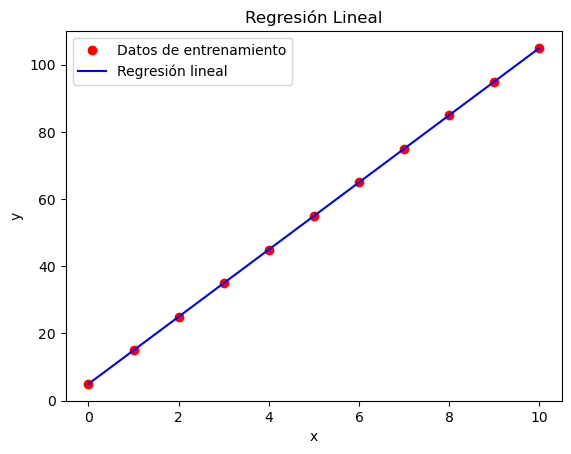

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida(lost)
def loss(real_y, pred_y):
    return tf.abs(real_y - pred_y) #MSE

# Datos de entrenamiento
x_train = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = np.asarray([i*10+5 for i in x_train]) # y = 10x+5
print(x_train)
print(y_train)
# Variables entrenables
a = tf.Variable(random.random(), trainable=True)
b = tf.Variable(random.random(), trainable=True)

# función de paso
def step(real_x, real_y):
    with tf.GradientTape(persistent=True) as tape:
        # Hacer predicción
        pred_y = a * real_x + b
        # Cáclulo de pérdida
        reg_loss = loss(real_y, pred_y)
        
    
    # Cacula gradientes
    a_gradients, b_gradients = tape.gradient(reg_loss, (a, b))

    # actualiza las variables
    a.assign_sub(a_gradients * 0.001)
    b.assign_sub(b_gradients * 0.001)

# ciclo de entrenamiento
for _ in range(10000):
    step(x_train, y_train)

print(f'y ≈ {a.numpy()}x + {b.numpy()}')
# Graficar la función de la regresión lineal
x_range = np.linspace(0, 10, 3) # definimos 3 datos  desde 0 hasta 10 dividios proporcionalmente
y_pred = a.numpy() * x_range + b.numpy() # definimos la funcion predicha con los parametros calculados anteriormente
# GRAFICAMOS LAS VARIABLES TANTO DE X COMO DE Y
plt.plot(x_train, y_train, 'ro', label='Datos de entrenamiento')
plt.plot(x_range, y_pred, 'b-', label='Regresión lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.legend()
plt.show()
del a, b, x_train, y_train, step, loss

In [11]:
x_range = np.linspace(0, 10, 3) # definimos 3 datos  desde 0 hasta 10 dividios proporcionalmente
x_range

array([ 0.,  5., 10.])

La función de paso se ejecutará en cada época para actualizar las variables entrenables, a y b



### **2.1 — Regresión polinómica**

Podemos ampliar rápidamente el ejemplo anterior para trabajar con cualquier polinomio.

Simplemente cambie las variables que estamos usando y la ecuación que estamos optimizando.

[ 0  1  2  3  4  5  6  7  8  9 10]
[  2  16  42  80 130 192 266 352 450 560 682]
y ≈ 6.007733345031738x^2 + 7.543153762817383x + 1.9993382692337036


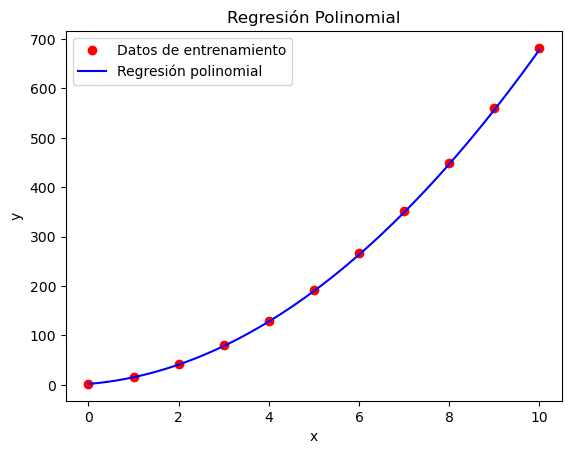

In [12]:
from prompt_toolkit.shortcuts.progress_bar import Label

import random
import numpy as np
import matplotlib.pyplot as plt
# función de pérdida
def loss(real_y, pred_y):
    return tf.abs(real_y - pred_y)

# Datos de entrenamiento
x_train = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = np.asarray([6*i**2 + 8*i + 2 for i in x_train]) # y = 6x^2 + 8x + 2
print(x_train)
print(y_train)
# variables entrenables
a = tf.Variable(random.random(), trainable=True)
b = tf.Variable(random.random(), trainable=True)
c = tf.Variable(random.random(), trainable=True)

# función de paso
def step(real_x, real_y):
    with tf.GradientTape(persistent=True) as tape:
        # hacer predicción
        pred_y = a*real_x**2 + b*real_x + c
        # Calcular pérdida
        poly_loss = loss(real_y, pred_y)
    
    # Calcular gradientes
    a_gradients, b_gradients, c_gradients = tape.gradient(poly_loss, (a, b, c))

    # actualizar variables
    a.assign_sub(a_gradients * 0.001)
    b.assign_sub(b_gradients * 0.001)
    c.assign_sub(c_gradients * 0.001)

# Ciclo de entrenamiento
for _ in range(100000):
    step(x_train, y_train)

print(f'y ≈ {a.numpy()}x^2 + {b.numpy()}x + {c.numpy()}')

#Grafica d ela funcion
# Graficar la función polinomial
x_range = np.linspace(0, 10, 100)

# Encontrar los parametros de la regresion polinomial
# a , b , c -> Ecuacion polinomica
y_pred = a.numpy() * x_range**2 + b.numpy() * x_range + c.numpy()

plt.plot(x_train, y_train, 'ro', label='Datos de entrenamiento')
plt.plot(x_range, y_pred, 'b-', label='Regresión polinomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Polinomial')
plt.legend()
plt.show()

del a, b, x_train, y_train, step, loss


### **2.2 — Clasificación de MNIST**

La regresión polinómica es divertida y todo, pero el verdadero problema es optimizar las redes neuronales.

Afortunadamente para nosotros, poco tiene que cambiar de los ejemplos anteriores para hacer precisamente eso.

Comenzamos siguiendo el procedimiento estándar, cargando los datos, preprocesándolos y configurando los hiperparámetros.

In [13]:
# imports necesarios
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
# parámetros
learning_rate = 0.01
n_epochs = 100
batch_size = 100

In [15]:
# cargamos el dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Comprobamos cómo es el dataset que hemos cargado y si necesita normalización:

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
x_train.max()

255

In [19]:
x_test.max()

255

In [20]:
# vamos a normalizar entre 0 y 1
x_train = x_train / 255.
x_test = x_test / 255.

In [21]:
print(x_train.max())
print(x_test.max())

1.0
1.0


También necesitamos convertir las imágenes a vectores.

In [22]:
# FLUTEN
x_train = tf.reshape(x_train, shape=(60000, -1))
print(x_train)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 784), dtype=float64)


In [23]:
x_test = tf.reshape(x_test, shape=(10000, -1))
print(x_test)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 784), dtype=float64)


Ahora nuestros datos ya están en formato [N_instancias, variables] (60000 instancias, 784 (28x28) píxeles).

A continuación, debemos fijarnos en el formato de nuestras etiquetas, que en este caso tendrán que estar codificadas en one-hot. De lo contrario, obtendremos un error.

In [24]:
print(y_train)
print(y_test)
print(y_train.shape)
print(y_test.shape)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
(60000,)
(10000,)


In [25]:
# convertimos las etiquetas a one-hot
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [26]:
np.array(y_train[0])

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [27]:
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

<dtype: 'float64'>
<dtype: 'float64'>
<dtype: 'float32'>
<dtype: 'float32'>


In [28]:
# convertimos las etiquetas a float64
y_train = tf.cast(y_train, 'float64')
y_test = tf.cast(y_test, 'float64')

In [29]:
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

<dtype: 'float64'>
<dtype: 'float64'>
<dtype: 'float64'>
<dtype: 'float64'>


In [30]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(10000).batch(batch_size)

# para el conjunto de test no vamos a necesitar el dataloader porque
# no vamos a procesar los datos por batches, sino todos a la vez, así 
# que utilizaremos x_test y y_test. 
# Si fuesemos a procesarlo por batches, se haría así:
# test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
# test_ds = test_ds.batch(batch_size)

In [31]:
# ¿Cuántas iteraciones habrá por época? 
# en una época se tienen que ver todos los elementos del dataset, y estamos
# pasándole los elementos de 100 en 100, así que habrá 60000 / 100 = 600 épocas
total_batch = x_train.shape[0] // batch_size
print(total_batch)

600


In [32]:
# creamos las variables W y b para el entrenamiento
W = tf.zeros([784, 10], tf.double)
b = tf.zeros([10], tf.double)

# para almacenar el histórico de costes
costs = []
# entrenamiento de nuestra red
for epoch in range(n_epochs):
    avg_cost = 0.
    
    # ¿si en vez de actualizar los pesos para cada imagen, lo hacemos
    # de X en X imágenes?
    for batch_xs, batch_ys in train_ds: #las 600 pasadas
        # empezamos con la optimización
  
        # usamos tf.GradientTape, que lleva un control de las variables
        # para poder calcular sus gradientes
        with tf.GradientTape() as tape:
            # le indicamos que "vigile" las variables a optimizar
            tape.watch(W)
            tape.watch(b)
            
            # ejecutamos el modelo
            pred = tf.nn.softmax(tf.matmul(batch_xs, W) + b)

            # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
            # a veces la llaman loss, a veces cost => es lo mismo
            cost = tf.reduce_mean(-tf.reduce_sum(batch_ys*tf.math.log(pred), axis=1)) # equivalenete a la funcion de perdida LOST

            # calculamos los gradientes (gradient descent)
            grad_W, grad_b = tape.gradient(cost, [W, b])

            # definimos las operaciones para actualizar los pesos con los gradientes calculados
            # y el learning rate
            W = W - learning_rate * grad_W
            b = b - learning_rate * grad_b

        # calculamos el coste teniendo en cuenta los batches que hay
        avg_cost += cost / total_batch
        
    # guardamos nuestro coste en el histórico
    costs.append(avg_cost)
    
    # imprimimos las iteraciones
    print("[{}] cost: {}".format(epoch, avg_cost))
print("Entrenamiento finalizado!!")

[0] cost: 1.1449214845858053
[1] cost: 0.6415581193470615
[2] cost: 0.5356627074010492
[3] cost: 0.48455561988523005
[4] cost: 0.453218891978922
[5] cost: 0.431494324159251
[6] cost: 0.41528404243703776
[7] cost: 0.4026696230544982
[8] cost: 0.39235515498642376
[9] cost: 0.3838443612976322
[10] cost: 0.3765399838234924
[11] cost: 0.37023490567956446
[12] cost: 0.3648129510432718
[13] cost: 0.3599586915859868
[14] cost: 0.35558229366300126
[15] cost: 0.3516963757958609
[16] cost: 0.3481322697152816
[17] cost: 0.34488316086158427
[18] cost: 0.3418994195391211
[19] cost: 0.3391525376903908
[20] cost: 0.33660122361797973
[21] cost: 0.3342050456516221
[22] cost: 0.3319659751490192
[23] cost: 0.32994495213935454
[24] cost: 0.32794542161039236
[25] cost: 0.32609653984831033
[26] cost: 0.32440850416658923
[27] cost: 0.32276227142360125
[28] cost: 0.3212092869806702
[29] cost: 0.31972070089125976
[30] cost: 0.31831618524105876
[31] cost: 0.31694556701350945
[32] cost: 0.3157300031497395
[33] co

In [33]:
# comprobamos lo que ha aprendido nuestra red
pred = tf.nn.softmax(tf.matmul(x_test, W) + b)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y_test, 1))

# calculamos el accuracy (precisión)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.numpy())

Accuracy: 0.9224


Text(0, 0.5, 'Loss')

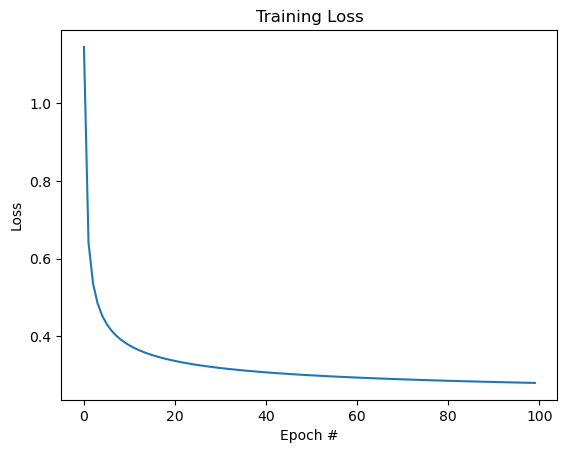

In [34]:
# veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
plt.plot(np.arange(0, n_epochs), costs)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")

### **TAREA**

Utilizar la diferenciación automática para calcular los parámetros de la regresión lineal aplicada a los datos proporcionados y comparar con los resultados de la práctica 02.